In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as st
import yfinance as yf



In [142]:
start = '2010-01-01' #yyyy-mm-dd  
end = '2024-02-27'   #yyyy-mm-dd


df = yf.download('RELIANCE.NS', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  498.814209  498.814209  467.155457  491.682404  440.421967   
2010-01-05  525.695618  525.695618  487.065033  489.488007  438.456299   
2010-01-06  493.693939  500.368591  489.465149  497.397003  445.540863   
2010-01-07  497.397003  509.740479  492.825348  505.648834  452.932343   
2010-01-08  506.540314  509.191895  501.054321  504.323059  451.744751   

              Volume  
Date                  
2010-01-04  38323043  
2010-01-05  10696412  
2010-01-06  11845880  
2010-01-07  13098960  
2010-01-08   7555074  


In [143]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,498.814209,498.814209,467.155457,491.682404,440.421967,38323043
1,2010-01-05,525.695618,525.695618,487.065033,489.488007,438.456299,10696412
2,2010-01-06,493.693939,500.368591,489.465149,497.397003,445.540863,11845880
3,2010-01-07,497.397003,509.740479,492.825348,505.648834,452.932343,13098960
4,2010-01-08,506.540314,509.191895,501.054321,504.323059,451.744751,7555074


In [144]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,498.814209,498.814209,467.155457,491.682404,38323043
1,525.695618,525.695618,487.065033,489.488007,10696412
2,493.693939,500.368591,489.465149,497.397003,11845880
3,497.397003,509.740479,492.825348,505.648834,13098960
4,506.540314,509.191895,501.054321,504.323059,7555074


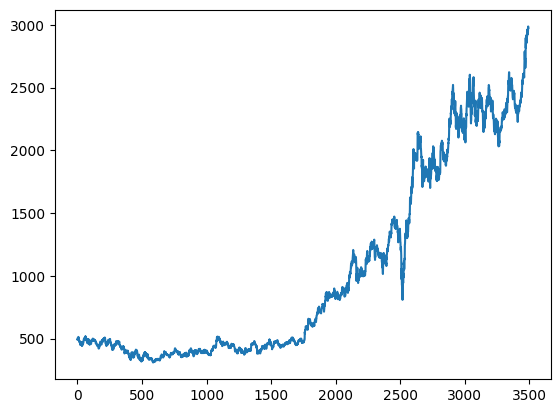

In [145]:
plt.plot(df.Close)

In [146]:
df

,Open,High,Low,Close,Volume
0,498.814209,498.814209,467.155457,491.682404,38323043
1,525.695618,525.695618,487.065033,489.488007,10696412
2,493.693939,500.368591,489.465149,497.397003,11845880
3,497.397003,509.740479,492.825348,505.648834,13098960
4,506.540314,509.191895,501.054321,504.323059,7555074
...,...,...,...,...,...
3488,2950.050049,2951.000000,2923.600098,2942.050049,3558748
3489,2948.000000,2977.050049,2915.100098,2935.399902,6360146
3490,2936.300049,2969.899902,2916.000000,2963.500000,9246864
3491,2979.000000,2995.100098,2966.699951,2987.250000,7219292


In [147]:
ma100 = df.Close.rolling(100).mean()
ma100 

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3488    2522.821492
3489    2528.770991
3490    2534.980991
3491    2541.164492
3492    2547.569990
Name: Close, Length: 3493, dtype: float64

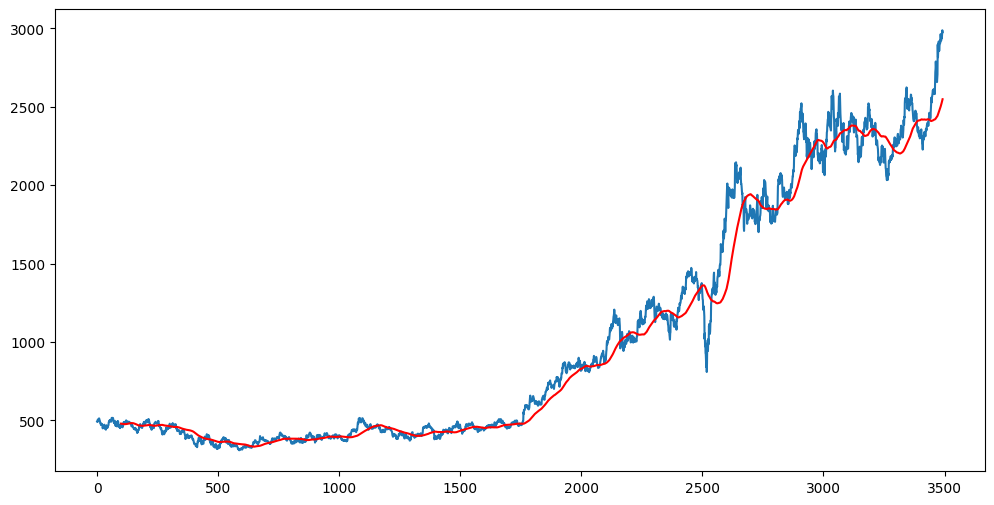

In [148]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [149]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3488    2465.430348
3489    2468.938590
3490    2472.458574
3491    2476.126152
3492    2479.591587
Name: Close, Length: 3493, dtype: float64

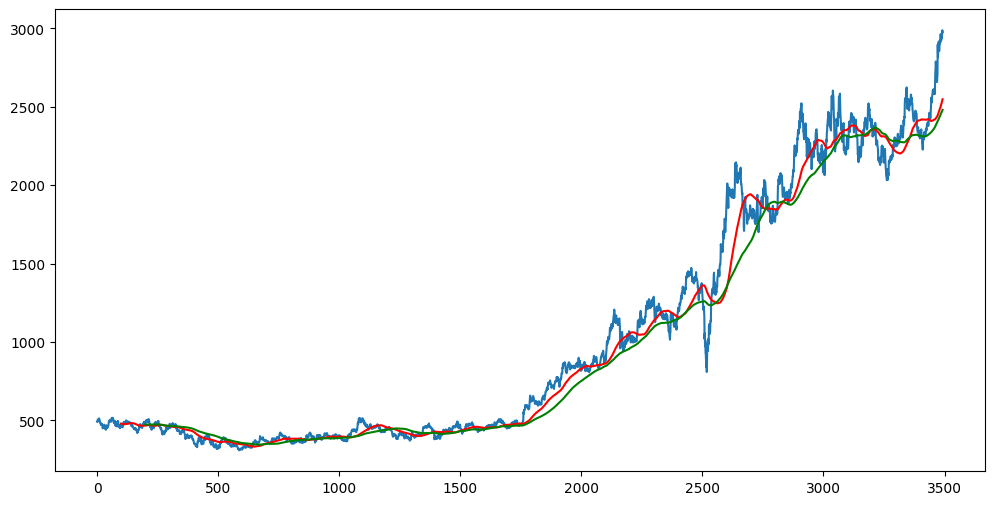

In [150]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [151]:
df.shape

(3493, 5)

In [152]:
 # spliting data into Training and Testing
Data_training = pd.DataFrame(df['Close'][0:int(len(df)* 0.70)])
Data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(Data_training.shape)
print(Data_testing.shape)

(2445, 1)
(1048, 1)


In [153]:
Data_training.head()

,Close
0,491.682404
1,489.488007
2,497.397003
3,505.648834
4,504.323059


In [154]:
Data_testing.head()

,Close
2445,1421.695923
2446,1437.879639
2447,1428.141968
2448,1428.553467
2449,1433.856567


In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [156]:
Data_training_array = scaler.fit_transform(Data_training)
Data_training_array

array([[0.15995833],
       [0.15803595],
       [0.16496456],
       ...,
       [0.99391241],
       [0.97292645],
       [0.9714446 ]])

In [157]:
Data_training_array.shape

(2445, 1)

In [158]:
X_train = []
y_train = []

for i in range (100,Data_training_array.shape[0]):
    X_train.append(Data_training_array[i-100:i])
    y_train.append(Data_training_array[i,0])
    
    
X_train,y_train = np.array(X_train), np.array(y_train)   

In [159]:
X_train.shape

(2345, 100, 1)

In [160]:
#ml model

In [161]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [162]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu',return_sequences = True,
          input_shape= (X_train.shape[1],1)))
model.add(Dropout(0.2))


model = Sequential()
model.add(LSTM(units = 60, activation ='relu',return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation ='relu',return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

model.build(input_shape=(None, X_train.shape[1], 1))


In [163]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100, 60)           14880     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)               96480     
                                                                 
 dropout_15 (Dropout)        (None, 120)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [164]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train ,epochs=110)

Epoch 1/70
74/74 [==============================] - 36s 316ms/step - loss: 0.0167
Epoch 2/70
74/74 [==============================] - 24s 327ms/step - loss: 0.0047
Epoch 3/70
74/74 [==============================] - 25s 336ms/step - loss: 0.0040
Epoch 4/70
74/74 [==============================] - 25s 336ms/step - loss: 0.0043
Epoch 5/70
74/74 [==============================] - 25s 337ms/step - loss: 0.0036
Epoch 6/70
74/74 [==============================] - 25s 332ms/step - loss: 0.0031
Epoch 7/70
74/74 [==============================] - 24s 329ms/step - loss: 0.0035
Epoch 8/70
74/74 [==============================] - 24s 327ms/step - loss: 0.0029
Epoch 9/70
74/74 [==============================] - 24s 326ms/step - loss: 0.0028
Epoch 10/70
74/74 [==============================] - 24s 320ms/step - loss: 0.0026
Epoch 11/70
74/74 [==============================] - 25s 338ms/step - loss: 0.0024
Epoch 12/70
74/74 [==============================] - 25s 342ms/step - loss: 0.0027
Epoch 13/70
7

In [165]:
model.save('RELIANCE.NS10.NS_keras_model.h5')

In [166]:
Data_testing.head()

,Close
2445,1421.695923
2446,1437.879639
2447,1428.141968
2448,1428.553467
2449,1433.856567


In [167]:
past_100_days = Data_training.tail(100)

In [168]:
final_df = pd.concat([past_100_days,Data_testing],ignore_index= True)

In [169]:
final_df.head()

,Close
0,1170.437256
1,1169.294434
2,1171.763062
3,1170.803101
4,1166.780029


In [170]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.16619199],
       [0.1656675 ],
       [0.16680045],
       ...,
       [0.98910018],
       [1.        ],
       [0.99421731]])

In [171]:
input_data.shape

(1148, 1)

In [172]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [173]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1048, 100, 1)
(1048,)


In [174]:
# making predication

y_predicated = model.predict(x_test)

33/33 [==============================] - 4s 104ms/step


In [175]:
y_predicated.shape

(1048, 1)

In [176]:
y_test

array([0.28150464, 0.28893199, 0.28446299, ..., 0.98910018, 1.        ,
       0.99421731])

In [177]:
y_predicated

array([[0.26774064],
       [0.26822093],
       [0.26863873],
       ...,
       [0.9433076 ],
       [0.94465613],
       [0.94742197]], dtype=float32)

In [178]:
scaler.scale_

array([0.00045894])

In [179]:
scale_factor = 1/0.01566171
y_predicated = y_predicated * scale_factor
y_test = y_test * scale_factor

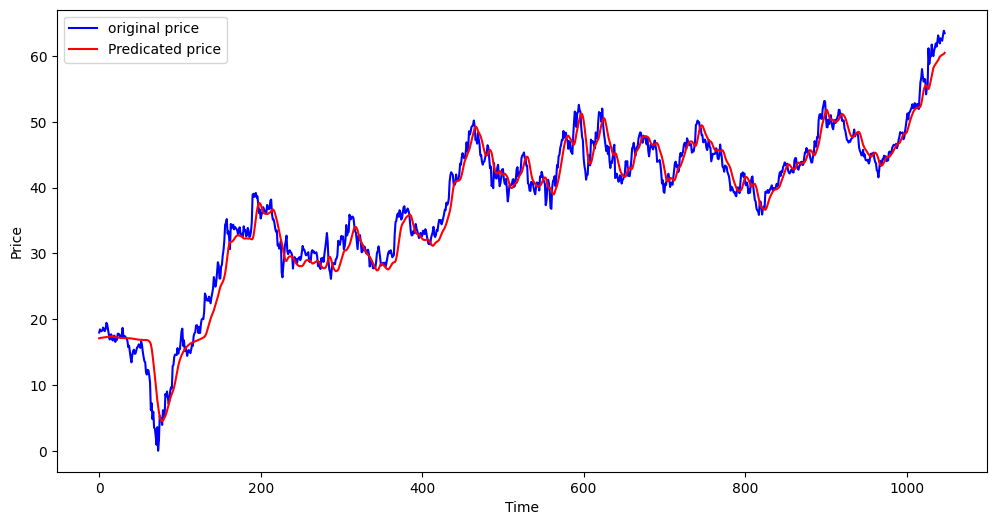

In [180]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='original price')
plt.plot(y_predicated,'r',label ='Predicated price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [90]:
import yfinance as yf

# Function to calculate intrinsic value based on user-provided P/E ratio and EPS
def calculate_intrinsic_value(ticker, pe, eps):
    # Fetch current market price
    stock = yf.Ticker(ticker)
    current_price = stock.history(period="1d")["Close"].iloc[-1]

    # Calculate intrinsic value
    intrinsic_value = pe * eps

    # Compare intrinsic value with current price
    if intrinsic_value > current_price:
        status = 'undervalued'
    elif intrinsic_value < current_price:
        status = 'overvalued'
    else:
        status = 'fairly valued'

    return intrinsic_value, current_price, status

# Input function to get PE and EPS from the user
def get_input():
    ticker = input("Enter the stock ticker symbol: ")
    pe = float(input("Enter the P/E ratio: "))
    eps = float(input("Enter the earnings per share (EPS): "))
    return ticker, pe, eps

# Example usage
ticker, pe, eps = get_input()
intrinsic_value, current_price, status = calculate_intrinsic_value(ticker, pe, eps)
print(f'Intrinsic Value: {intrinsic_value:.2f}')
print(f'Current Price: {current_price:.2f}')
print(f'Stock is {status}')


Enter the stock ticker symbol: POWERGRID.NS
Enter the P/E ratio: 15.73
Enter the earnings per share (EPS): 17.35
Intrinsic Value: 272.92
Current Price: 273.00
Stock is overvalued


In [91]:
import yfinance as yf

# Function to calculate intrinsic value based on historical data and user-provided P/E ratio and EPS
def calculate_intrinsic_value(ticker, start_date, end_date, pe, eps):
    # Fetch historical stock data for the specified period
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        return None, None, None, "Failed to fetch historical data"

    # Fetch current market price
    current_price = stock_data['Close'].iloc[-1]

    # Calculate intrinsic value
    intrinsic_value = pe * eps

    # Compare intrinsic value with current price
    if intrinsic_value > current_price:
        status = 'undervalued'
    elif intrinsic_value < current_price:
        status = 'overvalued'
    else:
        status = 'fairly valued'

    return intrinsic_value, current_price, status, None

# Input function to get PE and EPS from the user, along with start and end dates
def get_input():
    ticker = input("Enter the stock ticker symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    pe = float(input("Enter the P/E ratio: "))
    eps = float(input("Enter the earnings per share (EPS): "))
    return ticker, start_date, end_date, pe, eps

# Example usage
ticker, start_date, end_date, pe, eps = get_input()
intrinsic_value, current_price, status, error = calculate_intrinsic_value(ticker, start_date, end_date, pe, eps)
if error:
    print(error)
else:
    print(f'Intrinsic Value: {intrinsic_value:.2f}')
    print(f'Current Price: {current_price:.2f}')
    print(f'Stock is {status}')


Enter the stock ticker symbol: POWERGRID.NS
Enter the start date (YYYY-MM-DD): 2021-01-01
Enter the end date (YYYY-MM-DD): 2024-02-09
Enter the P/E ratio: 15.73
Enter the earnings per share (EPS): 17.35
[*********************100%%**********************]  1 of 1 completed
Intrinsic Value: 272.92
Current Price: 276.20
Stock is overvalued


In [99]:
import yfinance as yf

# Function to calculate intrinsic value based on user-provided P/E ratio and EPS
def calculate_intrinsic_value(ticker, start_year, end_year, pe, eps):
    # Fetch historical stock data for the specified period
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-12-31"
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        return None, None, None, "Failed to fetch historical data"

    # Calculate intrinsic value using the user-provided P/E ratio and EPS
    intrinsic_value = pe * eps

    # Fetch current market price
    current_price = stock_data['Close'].iloc[-1]

    # Compare intrinsic value with current price
    if intrinsic_value > current_price:
        status = 'undervalued'
    elif intrinsic_value < current_price:
        status = 'overvalued'
    else:
        status = 'fairly valued'

    return intrinsic_value, current_price, status, None

# Input function to get user-provided data
def get_input():
    ticker = input("Enter the stock ticker symbol: ")
    start_year = int(input("Enter the start year: "))
    end_year = int(input("Enter the end year: "))
    pe = float(input("Enter the P/E ratio: "))
    eps = float(input("Enter the earnings per share (EPS): "))
    return ticker, start_year, end_year, pe, eps

# Example usage
ticker, start_year, end_year, pe, eps = get_input()
intrinsic_value, current_price, status, error = calculate_intrinsic_value(ticker, start_year, end_year, pe, eps)
if error:
    print(error)
else:
    print(f'Intrinsic Value: {intrinsic_value:.2f}')
    print(f'Current Price: {current_price:.2f}')
    print(f'Stock is {status}')


Enter the stock ticker symbol: POWERGRID.NS
Enter the start year: 2021
Enter the end year: 2024
Enter the P/E ratio: 15.73
Enter the earnings per share (EPS): 17.35
[*********************100%%**********************]  1 of 1 completed
Intrinsic Value: 272.92
Current Price: 273.00
Stock is overvalued


In [96]:
w = 20.1
t = 5
print(w/t)

4.0200000000000005
